In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter
%matplotlib inline


In [3]:
def func(x):
    return 3*np.sin(x)

In [4]:
xlist = np.linspace(-5,5,100)
ylist = func(xlist)

In [5]:
metadata = dict(title = 'Test',author = 'Tanish')
writer = PillowWriter(fps = 20,metadata=metadata)

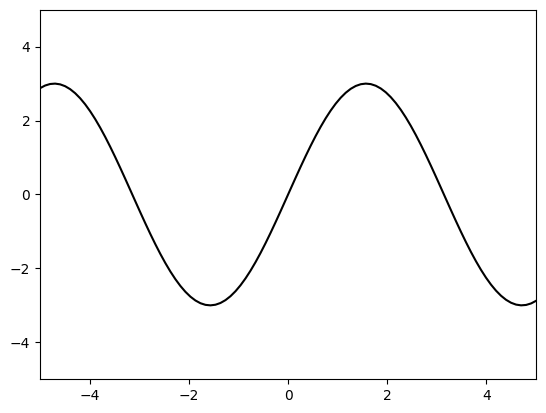

In [6]:
fig = plt.figure()
l, = plt.plot([],[],'k-')
l.set_data(xlist,ylist)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()

In [7]:
xlist = []
ylist = []
with writer.saving(fig,"Sinwave.gif",100):
    for xval in np.linspace(-5,5,100):
        xlist.append(xval)
        ylist.append(func(xval))

        l.set_data(xlist,ylist)

        writer.grab_frame()

In [8]:
from matplotlib.animation import FFMpegWriter

plt.rcParams['animation.ffmpeg_path'] = 'C:\\Users\\Tanish\\Desktop\\ffmpeg-4.4-full_build\\bin\\ffmpeg.exe'

In [9]:
writer = FFMpegWriter(fps = 20,metadata=metadata)

In [ ]:
import numpy as np
import matplotlib
# matplotlib.use("Agg") # useful for a webserver case where you don't want to ever visualize the result live.
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter, PillowWriter
from tqdm import tqdm

# Fixing random state for reproducibility
np.random.seed(19680801)


metadata = dict(title='Movie', artist='codinglikemad')
# writer = PillowWriter(fps=15, metadata=metadata)
writer = PillowWriter(fps=15, metadata=metadata)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

plt.xlim(-5, 5)
plt.ylim(-5, 5)


def func(x,y,r,t):
    return np.cos(r/2+t)*np.exp(-np.square(r)/50)

xvec = np.linspace(-10, 10, 1000)
yvec = np.linspace(-10, 10, 1000)

xlist, ylist = np.meshgrid(xvec, yvec)

rlist = np.sqrt( np.square(xlist) + np.square(ylist) )

with writer.saving(fig, "exp3d.gif", 100):
    for tval in tqdm(np.linspace(0,20,160)):
        zval = func(xlist,ylist,rlist, tval)
        ax.set_zlim(-1, 1)
        ax.plot_surface(xlist,ylist,zval,cmap=cm.viridis)

        writer.grab_frame()
        plt.cla()

100%|██████████| 160/160 [00:41<00:00,  3.90it/s]
